Epoch 0, Loss: 0.6819
Epoch 100, Loss: 0.3953
Epoch 200, Loss: 0.2978
Epoch 300, Loss: 0.2496
Epoch 400, Loss: 0.2211
Epoch 500, Loss: 0.2023
Epoch 600, Loss: 0.1891
Epoch 700, Loss: 0.1792
Epoch 800, Loss: 0.1716
Epoch 900, Loss: 0.1656


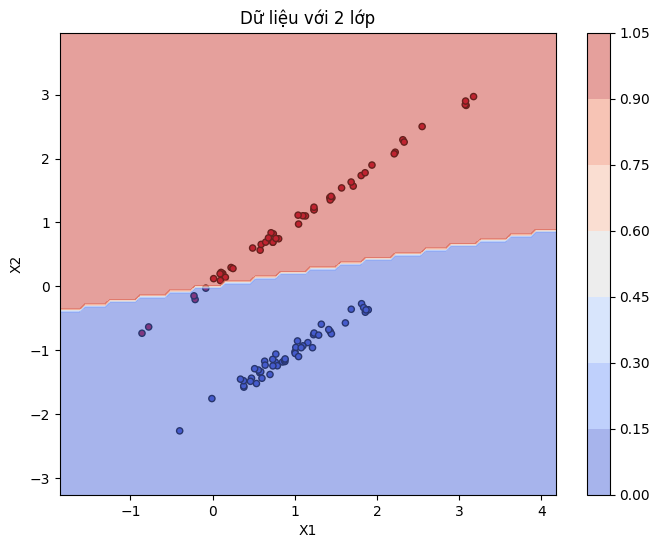

Epoch 0, Loss: 1.1039
Epoch 100, Loss: 0.7448
Epoch 200, Loss: 0.5818
Epoch 300, Loss: 0.4884
Epoch 400, Loss: 0.4286
Epoch 500, Loss: 0.3875
Epoch 600, Loss: 0.3578
Epoch 700, Loss: 0.3354
Epoch 800, Loss: 0.3179
Epoch 900, Loss: 0.3040


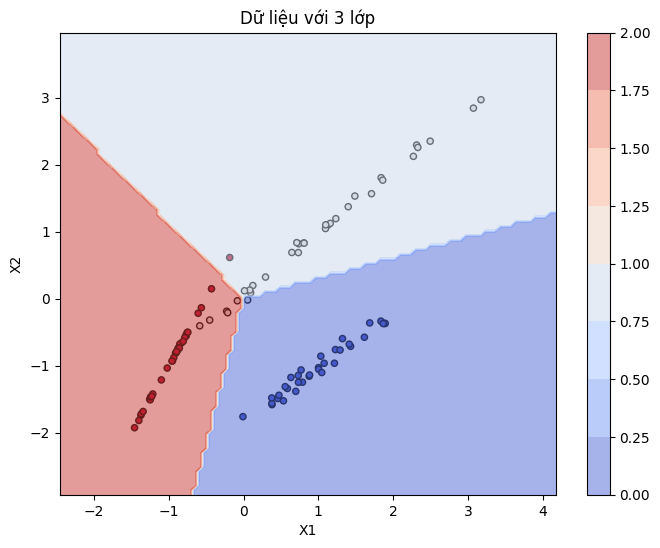

In [8]:
import numpy as np  
import matplotlib.pyplot as plt  
from sklearn.datasets import make_classification  

# Hàm Softmax  
def softmax(z):  
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))  
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)  

# Hàm Cross-Entropy Loss  
def cross_entropy_loss(y_true, y_pred):  
    return -np.sum(y_true * np.log(y_pred + 1e-15)) / y_true.shape[0]  

# Huấn luyện mô hình Softmax  
def train_softmax(X, y_onehot, learning_rate=0.01, num_epochs=1000):  
    num_samples, num_features = X.shape  
    num_classes = y_onehot.shape[1]  
    
    # Khởi tạo trọng số ngẫu nhiên  
    weights = np.random.randn(num_features, num_classes) * 0.01  
    
    for epoch in range(num_epochs):  
        # Tính toán logits  
        logits = np.dot(X, weights)  
        y_pred = softmax(logits)  
        
        # Tính loss  
        loss = cross_entropy_loss(y_onehot, y_pred)  

        # Tính gradient và cập nhật trọng số  
        gradient = np.dot(X.T, (y_pred - y_onehot)) / num_samples  
        weights -= learning_rate * gradient  
        
        if epoch % 100 == 0:  
            print(f"Epoch {epoch}, Loss: {loss:.4f}")  
    
    return weights  

# Hàm tạo dữ liệu và thực hiện huấn luyện cho 2 lớp  
def create_and_train_two_classes():  
    # Tạo dữ liệu với 2 lớp  
    X, y = make_classification(n_samples=100, n_features=2, n_classes=2, n_clusters_per_class=1, n_redundant=0, random_state=42)  
    
    # Chuyển đổi nhãn thành one-hot encoding  
    y_onehot = np.eye(2)[y]  
    
    # Huấn luyện mô hình  
    weights = train_softmax(X, y_onehot)  

    # Vẽ quyết định biên  
    plt.figure(figsize=(8, 6))  
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolor='k', s=20)  
    plt.title("Dữ liệu với 2 lớp")  
    plt.xlabel("X1")  
    plt.ylabel("X2")  
    
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1  
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1  
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))  
    
    Z = softmax(np.dot(np.c_[xx.ravel(), yy.ravel()], weights))  
    Z = np.argmax(Z, axis=1).reshape(xx.shape)  
    
    plt.contourf(xx, yy, Z, alpha=0.5, cmap='coolwarm')  
    plt.colorbar()  
    plt.show()  

# Hàm tạo dữ liệu và thực hiện huấn luyện cho 3 lớp  
def create_and_train_three_classes():  
    # Tạo dữ liệu với 3 lớp  
    X, y = make_classification(n_samples=100, n_features=2, n_classes=3, n_clusters_per_class=1, n_redundant=0, random_state=42)  
    
    # Chuyển đổi nhãn thành one-hot encoding  
    y_onehot = np.eye(3)[y]  
    
    # Huấn luyện mô hình  
    weights = train_softmax(X, y_onehot)  

    # Vẽ quyết định biên  
    plt.figure(figsize=(8, 6))  
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolor='k', s=20)  
    plt.title("Dữ liệu với 3 lớp")  
    plt.xlabel("X1")  
    plt.ylabel("X2")  
    
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1  
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1  
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))  
    
    Z = softmax(np.dot(np.c_[xx.ravel(), yy.ravel()], weights))  
    Z = np.argmax(Z, axis=1).reshape(xx.shape)  
    
    plt.contourf(xx, yy, Z, alpha=0.5, cmap='coolwarm')  
    plt.colorbar()  
    plt.show()  

# Chạy cho 2 lớp  
create_and_train_two_classes()  

# Chạy cho 3 lớp  
create_and_train_three_classes()

In [11]:
import numpy as np  
import matplotlib.pyplot as plt  
import torchvision  
import torchvision.transforms as transforms  
from sklearn.decomposition import PCA  
from sklearn.preprocessing import OneHotEncoder  

# Hàm Softmax  
def softmax(z):  
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))  
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)  

# Hàm Cross-Entropy Loss  
def cross_entropy_loss(y_true, y_pred):  
    return -np.sum(y_true * np.log(y_pred + 1e-15)) / y_true.shape[0]  

# Huấn luyện mô hình Softmax  
def train_softmax(X, y_onehot, learning_rate=0.01, num_epochs=1000):  
    num_samples, num_features = X.shape  
    num_classes = y_onehot.shape[1]  
    
    # Khởi tạo trọng số ngẫu nhiên  
    weights = np.random.randn(num_features, num_classes) * 0.01  
    
    for epoch in range(num_epochs):  
        # Tính toán logits  
        logits = np.dot(X, weights)  
        y_pred = softmax(logits)  
        
        # Tính loss  
        loss = cross_entropy_loss(y_onehot, y_pred)  

        # Tính gradient và cập nhật trọng số  
        gradient = np.dot(X.T, (y_pred - y_onehot)) / num_samples  
        weights -= learning_rate * gradient  
        
        if epoch % 100 == 0:  
            print(f"Epoch {epoch}, Loss: {loss:.4f}")  
    
    return weights  

# Bước 1: Tải dữ liệu CIFAR-10  
def load_cifar10_data():  
    transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])  
    trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)  

    X_train = np.array([img.view(-1).numpy() for img, _ in trainset])  
    y_train = np.array([label for _, label in trainset])  
    
    return X_train, y_train  

# Trực quan hóa  
def visualize(X, y, weights):  
    # Sử dụng PCA để giảm chiều 3072 thành 2 chiều  
    pca = PCA(n_components=2)  
    X_pca = pca.fit_transform(X)  

    # Dự đoán lớp sử dụng mô hình đã huấn luyện  
    logits = np.dot(X, weights)  
    y_pred = softmax(logits)  
    y_pred_classes = np.argmax(y_pred, axis=1)  

    # Vẽ đồ thị  
    plt.figure(figsize=(10, 8))  
    scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred_classes, cmap='coolwarm', alpha=0.5)  
    plt.title("Visualization of CIFAR-10 Classes after PCA")  
    plt.xlabel("Principal Component 1")  
    plt.ylabel("Principal Component 2")  
    plt.colorbar(scatter, ticks=range(10), label='Class')  
    plt.show()  

# Hàm thực hiện huấn luyện và trực quan hóa  
def create_and_train_and_visualize():  
    X_train, y_train = load_cifar10_data()  

    # Chuyển đổi nhãn thành one-hot encoding  
    number_of_classes = 10  # CIFAR-10 có 10 lớp  
    y_onehot = np.eye(number_of_classes)[y_train]  

    # Huấn luyện mô hình  
    weights = train_softmax(X_train, y_onehot)  

    # Trực quan hóa  
    visualize(X_train, y_train, weights)  

# Chạy hàm để huấn luyện và trực quan hóa  
create_and_train_and_visualize()

Files already downloaded and verified
Epoch 0, Loss: 2.3172
Epoch 100, Loss: 1.8800
Epoch 200, Loss: 1.8308
Epoch 300, Loss: 1.8063
Epoch 400, Loss: 1.7902
Epoch 500, Loss: 1.7783


KeyboardInterrupt: 